# National Parks Visitation Analysis
## Individual Park Trends and Seasonality Analysis


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (16, 10)


## 1. Load and Clean Data


In [21]:
# Load data
df = pd.read_csv('Datasets/national_parks.csv')

# Clean numeric columns
numeric_columns = ['RecreationVisits', 'NonRecreationVisits']
for col in numeric_columns:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', ''), errors='coerce')

df['RecreationVisits'] = df['RecreationVisits'].fillna(0)
df['NonRecreationVisits'] = df['NonRecreationVisits'].fillna(0)
df['TotalVisits'] = df['RecreationVisits'] + df['NonRecreationVisits']

print(f"Data loaded: {len(df)} records")
print(f"Parks: {df['ParkName'].nunique()}")
print(f"Years: {df['Year'].min()} - {df['Year'].max()}")


Data loaded: 34151 records
Parks: 63
Years: 1979 - 2024


/var/folders/y1/sdp6z2n512jfxp76fkhspjfc0000gn/T/ipykernel_79535/3613798514.py:2: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Datasets/national_parks.csv')


## 2. Cluster Parks by Size


In [22]:
# Calculate total visitation per park
park_totals = df.groupby('ParkName')['TotalVisits'].sum().reset_index()
park_totals.columns = ['ParkName', 'TotalVisitsAllTime']

# Cluster into 4 size categories using quantiles
park_totals['SizeCategory'] = pd.qcut(park_totals['TotalVisitsAllTime'], 
                                        q=4, 
                                        labels=['Small', 'Medium', 'Large', 'Extra Large'])

# Merge back to main dataframe
df = df.merge(park_totals[['ParkName', 'SizeCategory']], on='ParkName', how='left')

print("Park distribution by size:")
print(park_totals['SizeCategory'].value_counts())
print(f"\nExtra Large parks: {park_totals[park_totals['SizeCategory']=='Extra Large']['TotalVisitsAllTime'].min():,.0f} - {park_totals[park_totals['SizeCategory']=='Extra Large']['TotalVisitsAllTime'].max():,.0f}")
print(f"Large parks: {park_totals[park_totals['SizeCategory']=='Large']['TotalVisitsAllTime'].min():,.0f} - {park_totals[park_totals['SizeCategory']=='Large']['TotalVisitsAllTime'].max():,.0f}")
print(f"Medium parks: {park_totals[park_totals['SizeCategory']=='Medium']['TotalVisitsAllTime'].min():,.0f} - {park_totals[park_totals['SizeCategory']=='Medium']['TotalVisitsAllTime'].max():,.0f}")
print(f"Small parks: {park_totals[park_totals['SizeCategory']=='Small']['TotalVisitsAllTime'].min():,.0f} - {park_totals[park_totals['SizeCategory']=='Small']['TotalVisitsAllTime'].max():,.0f}")


Park distribution by size:
SizeCategory
Small          16
Medium         16
Extra Large    16
Large          15
Name: count, dtype: int64

Extra Large parks: 92,890,436 - 895,608,088
Large parks: 39,353,231 - 88,350,565
Medium parks: 13,774,185 - 33,870,544
Small parks: 321,697 - 11,308,895


## 3. Calculate Average Monthly Visitation by Park


In [23]:
# Calculate average visitation by park and month across all years
monthly_avg = df.groupby(['ParkName', 'SizeCategory', 'Month'])['TotalVisits'].mean().reset_index()
monthly_avg.columns = ['ParkName', 'SizeCategory', 'Month', 'AvgVisits']

print(f"Monthly averages calculated for {monthly_avg['ParkName'].nunique()} parks")
monthly_avg.head(12)


Monthly averages calculated for 63 parks


/var/folders/y1/sdp6z2n512jfxp76fkhspjfc0000gn/T/ipykernel_79535/303193978.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_avg = df.groupby(['ParkName', 'SizeCategory', 'Month'])['TotalVisits'].mean().reset_index()


,ParkName,SizeCategory,Month,AvgVisits
0,Acadia NP,Small,1,NaN
1,Acadia NP,Small,2,NaN
2,Acadia NP,Small,3,NaN
3,Acadia NP,Small,4,NaN
4,Acadia NP,Small,5,NaN
5,Acadia NP,Small,6,NaN
6,Acadia NP,Small,7,NaN
7,Acadia NP,Small,8,NaN
8,Acadia NP,Small,9,NaN
9,Acadia NP,Small,10,NaN


## 4. Line Graphs: Monthly Visitation by Park Size


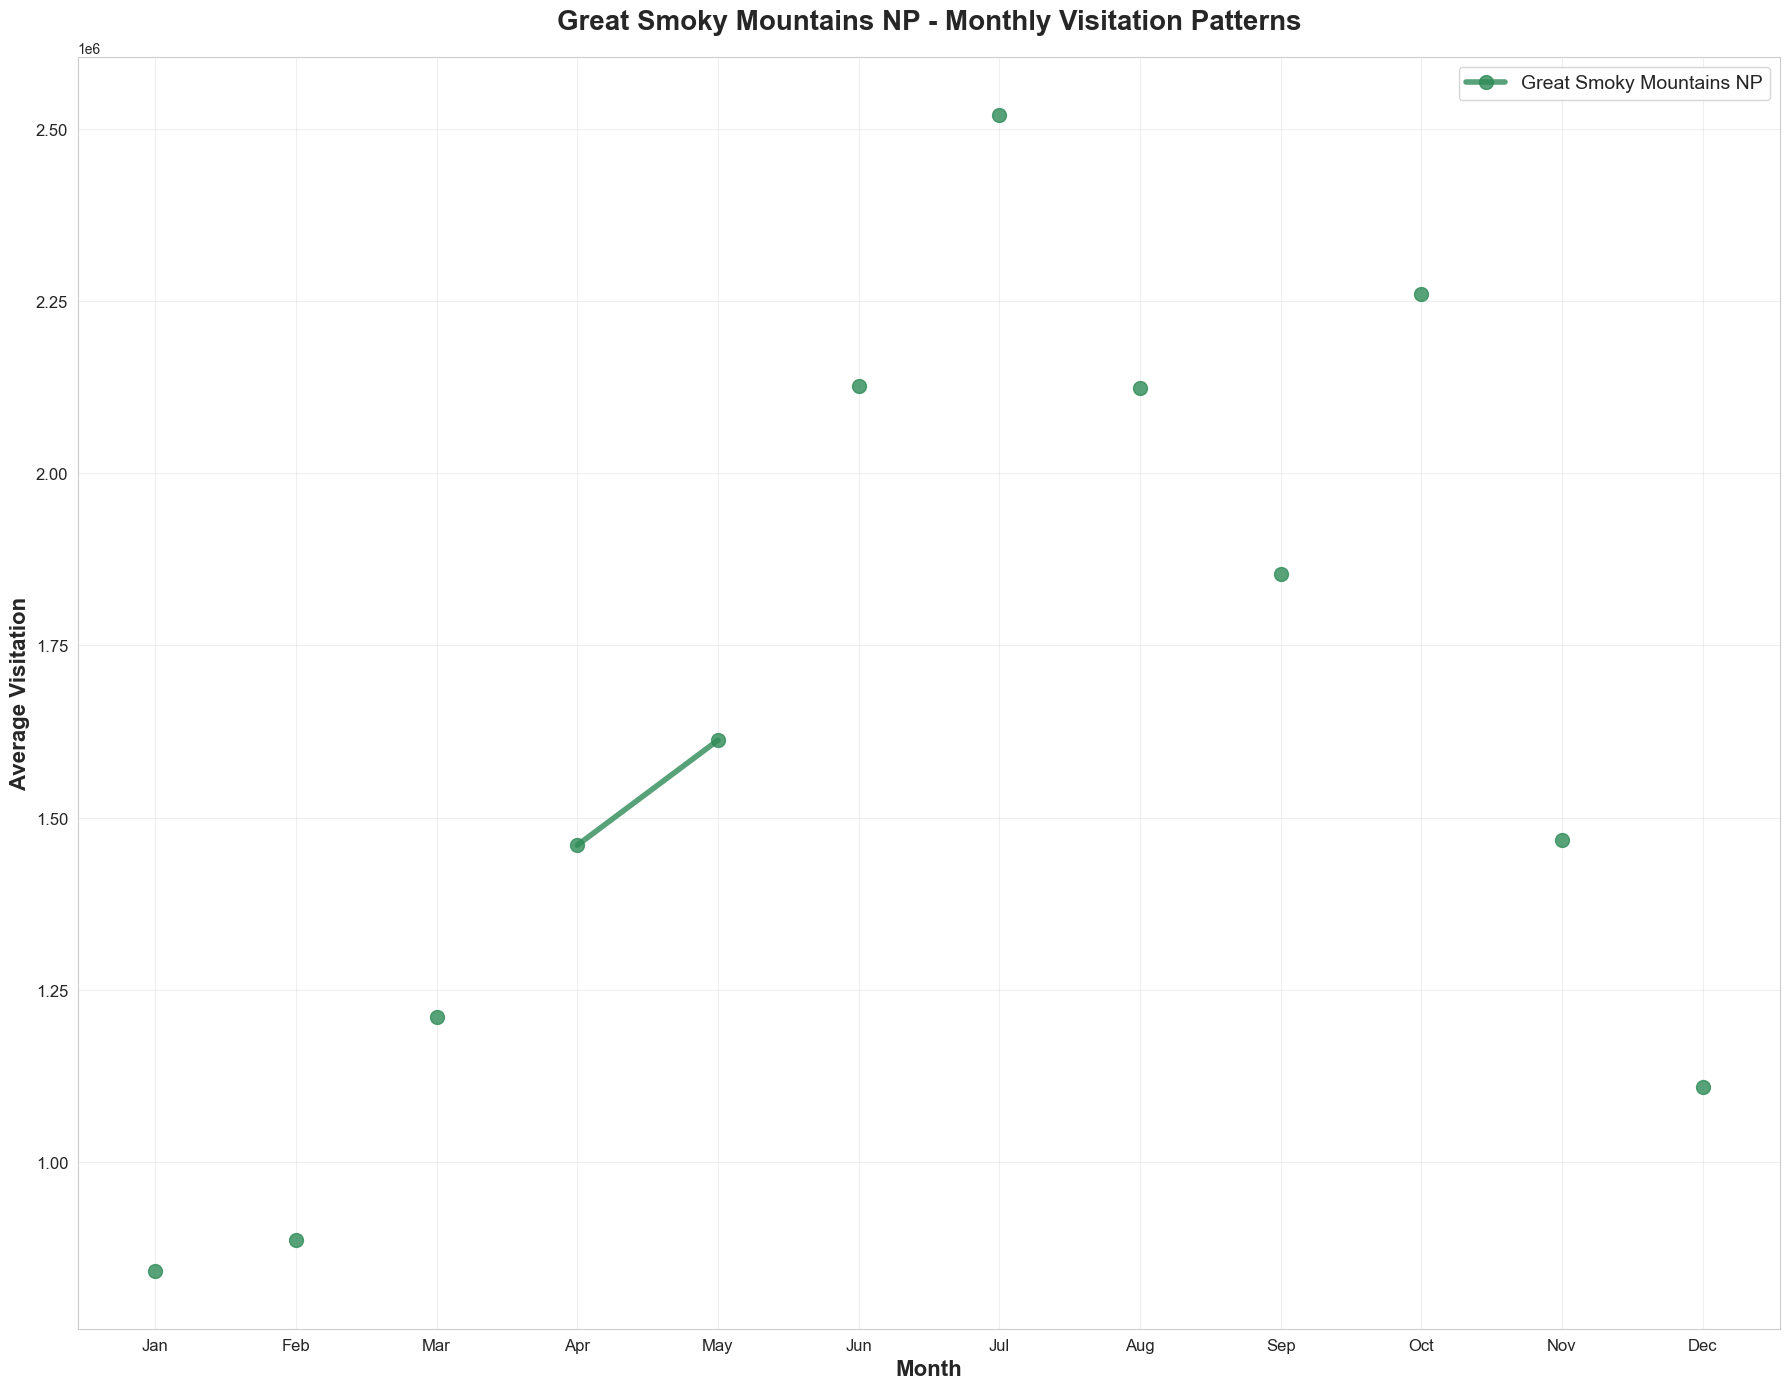

Great Smoky Mountains NP plotted separately\n


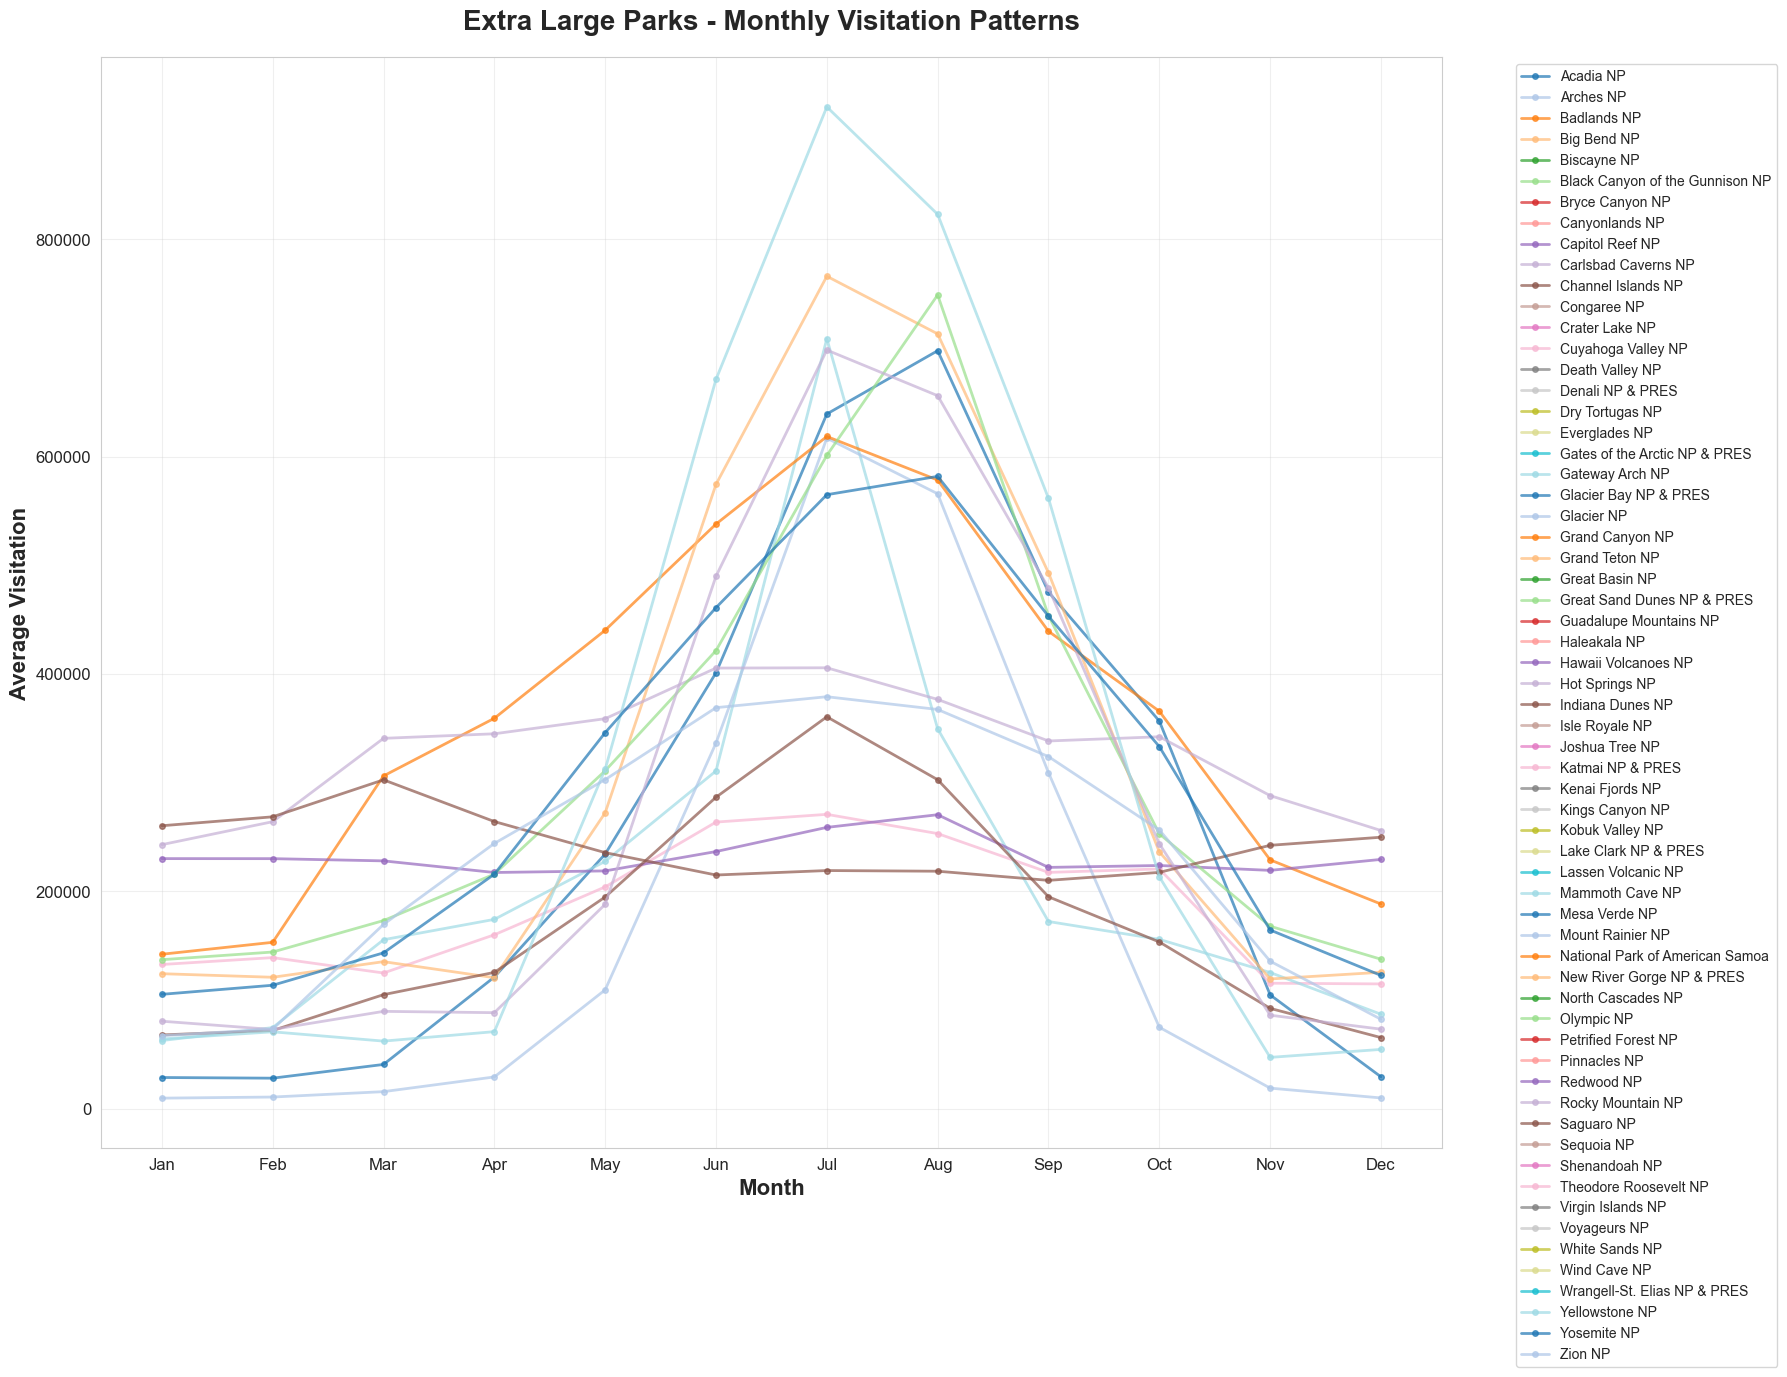

Extra Large parks: 62 parks plotted\n


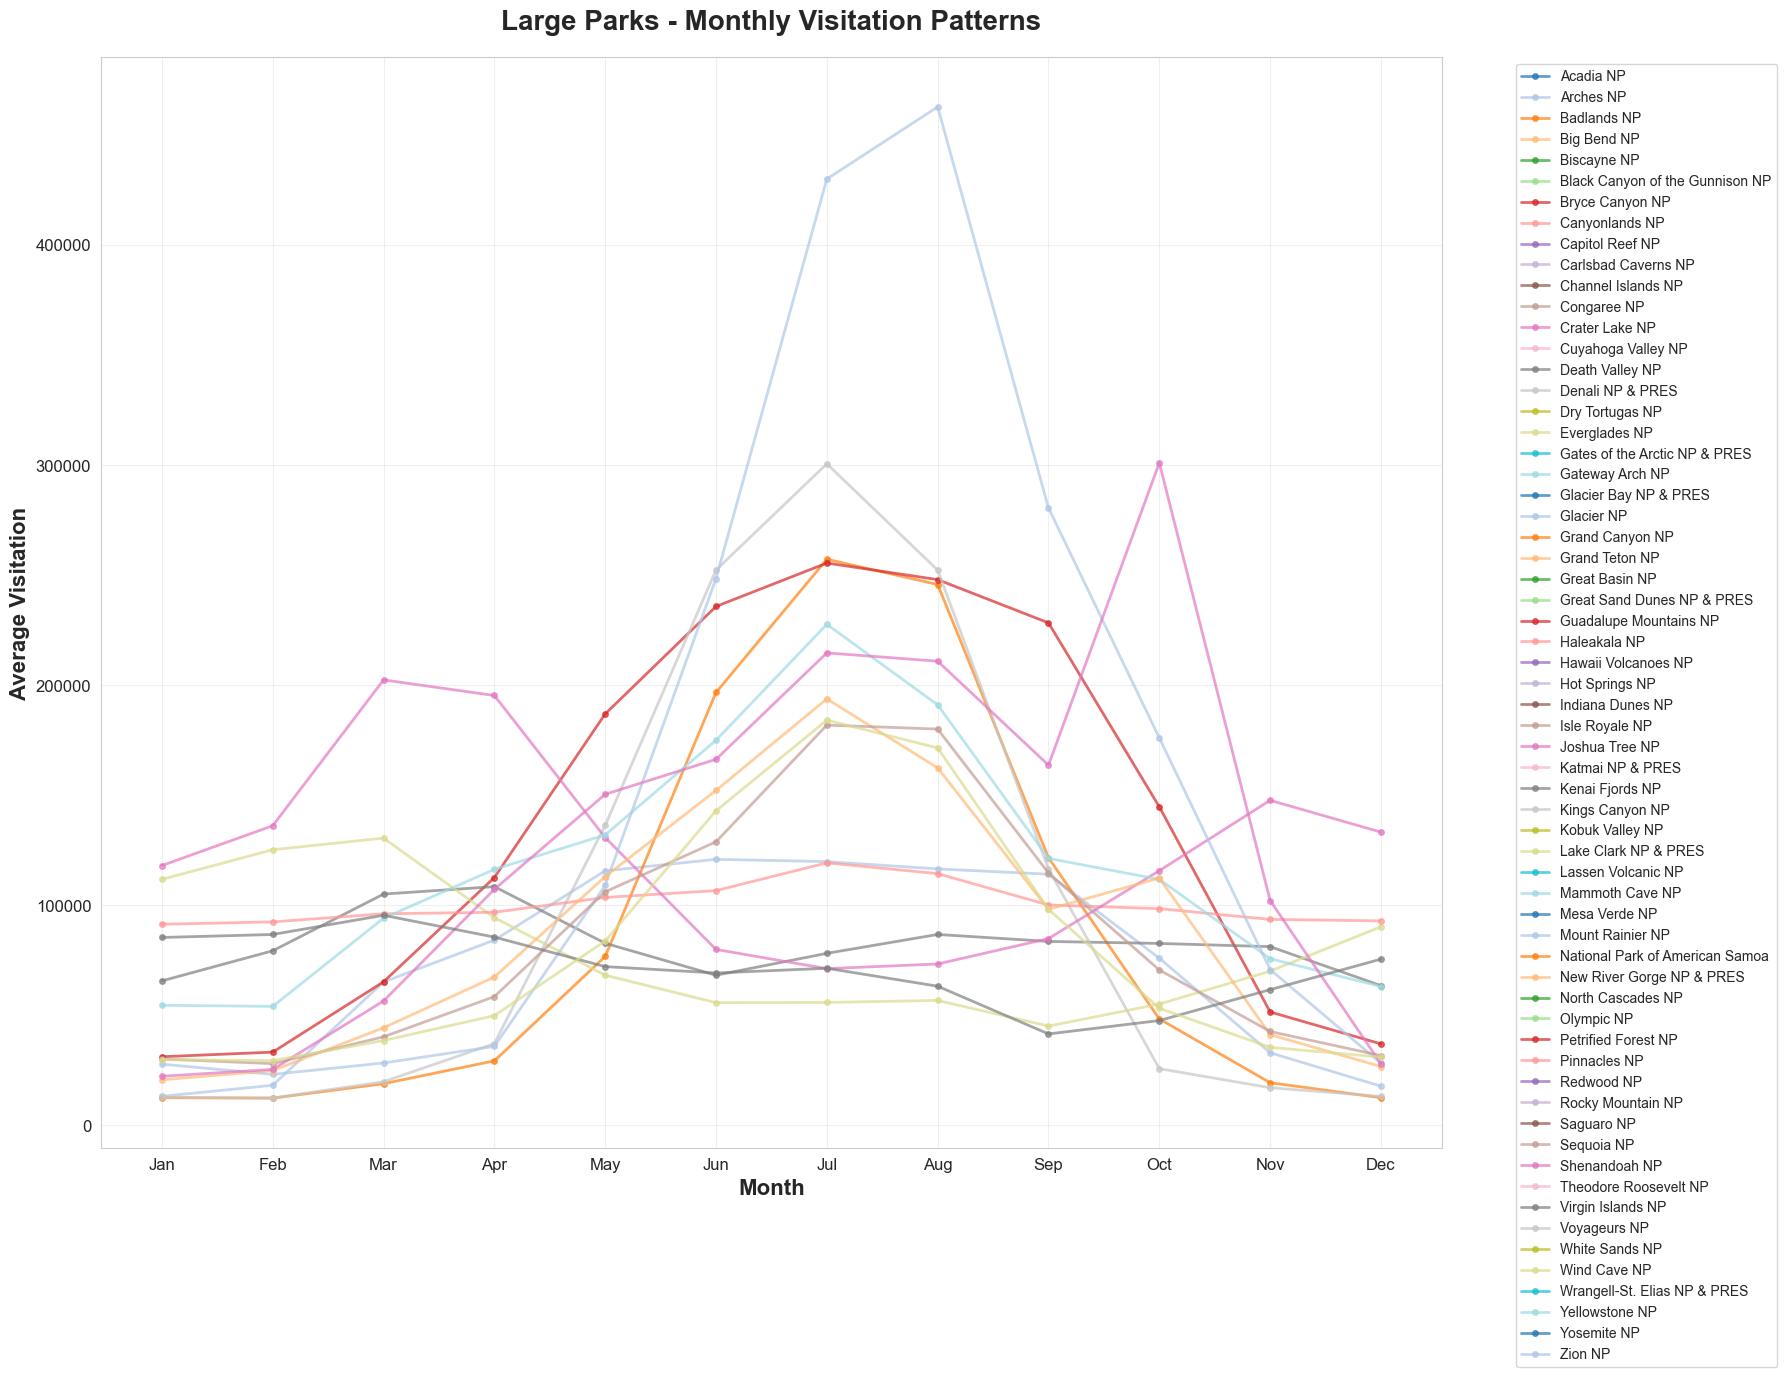

Large parks: 62 parks plotted\n


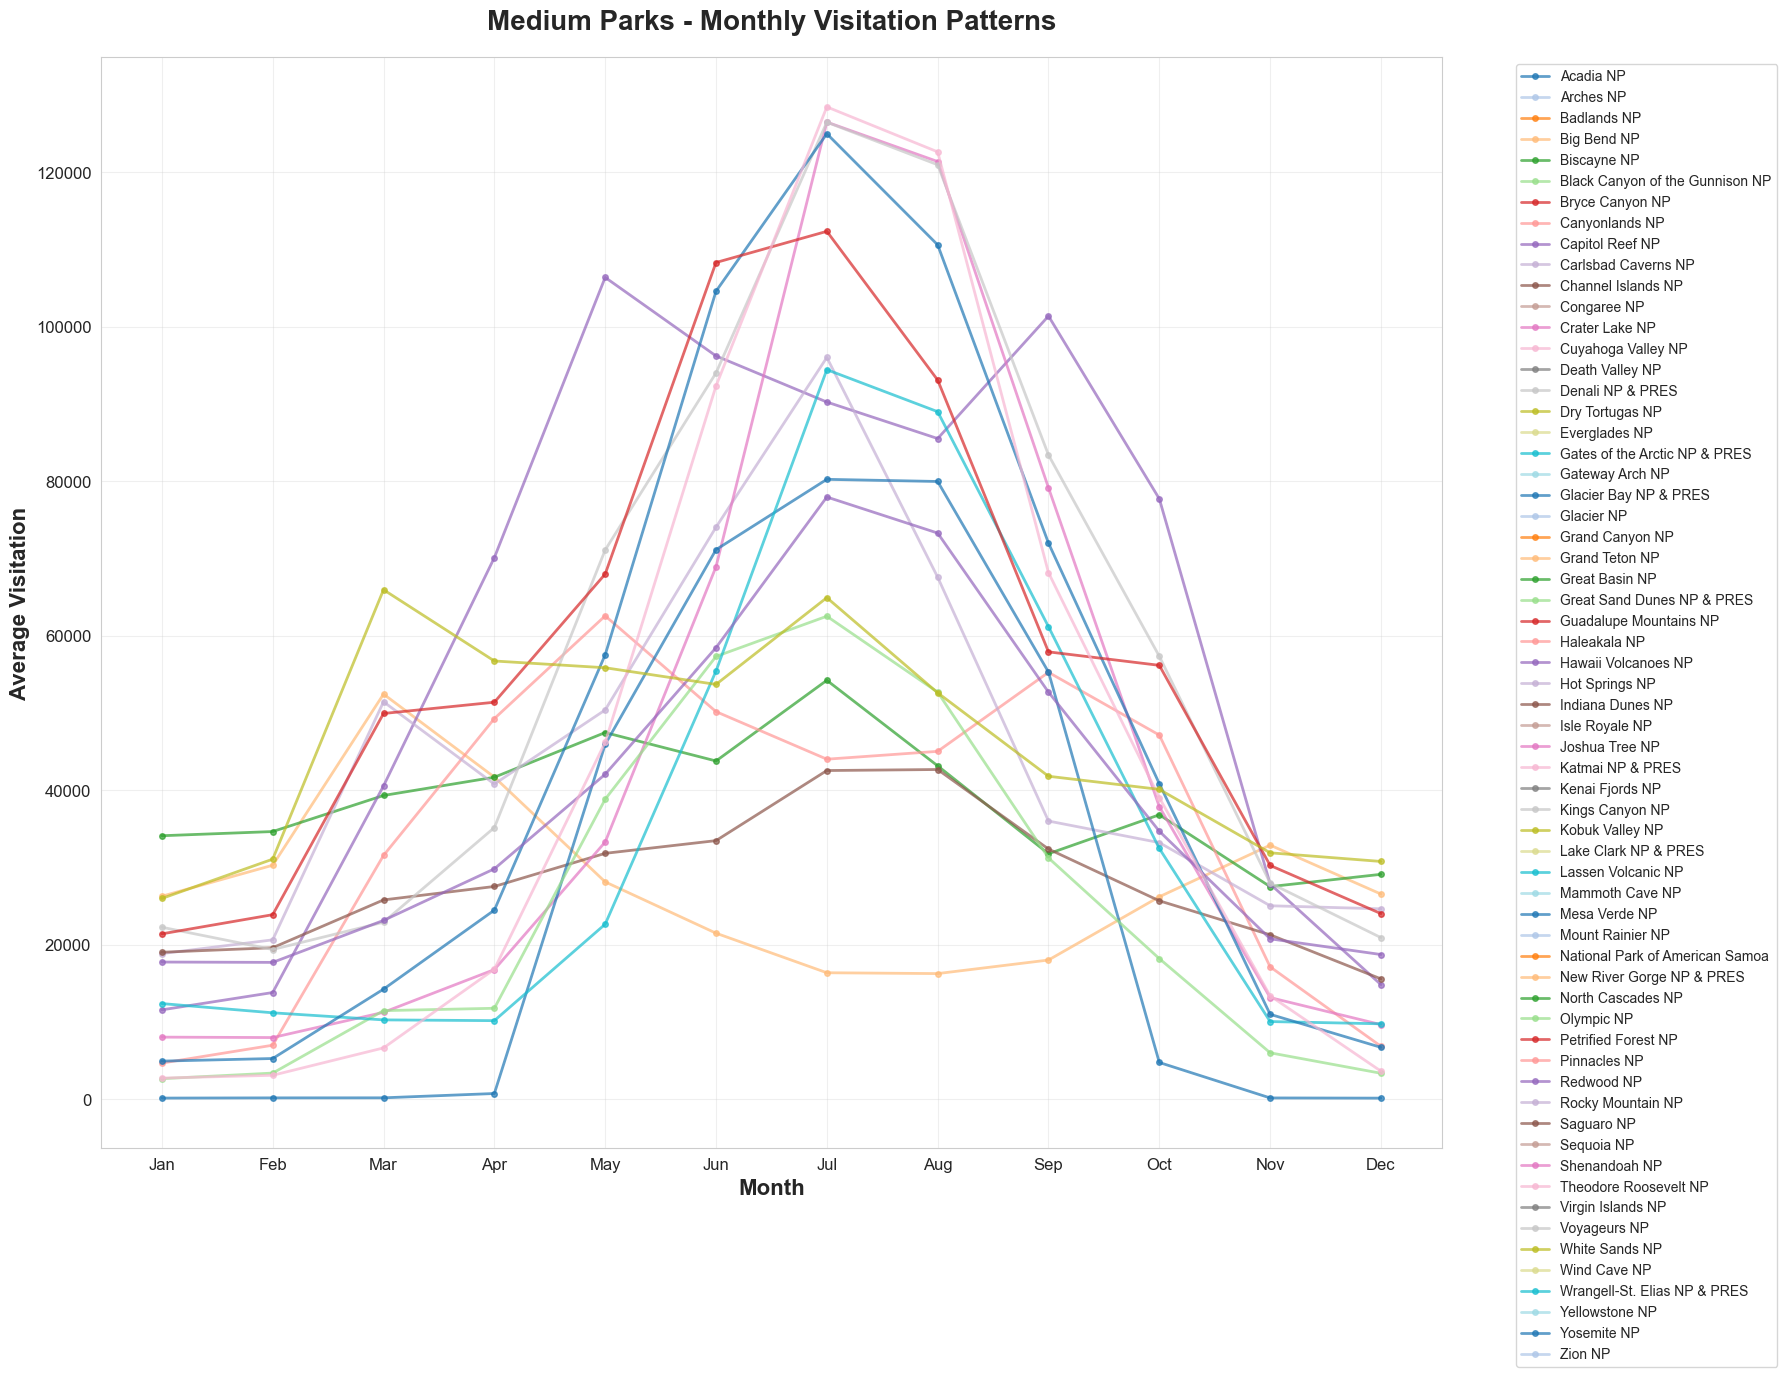

Medium parks: 62 parks plotted\n


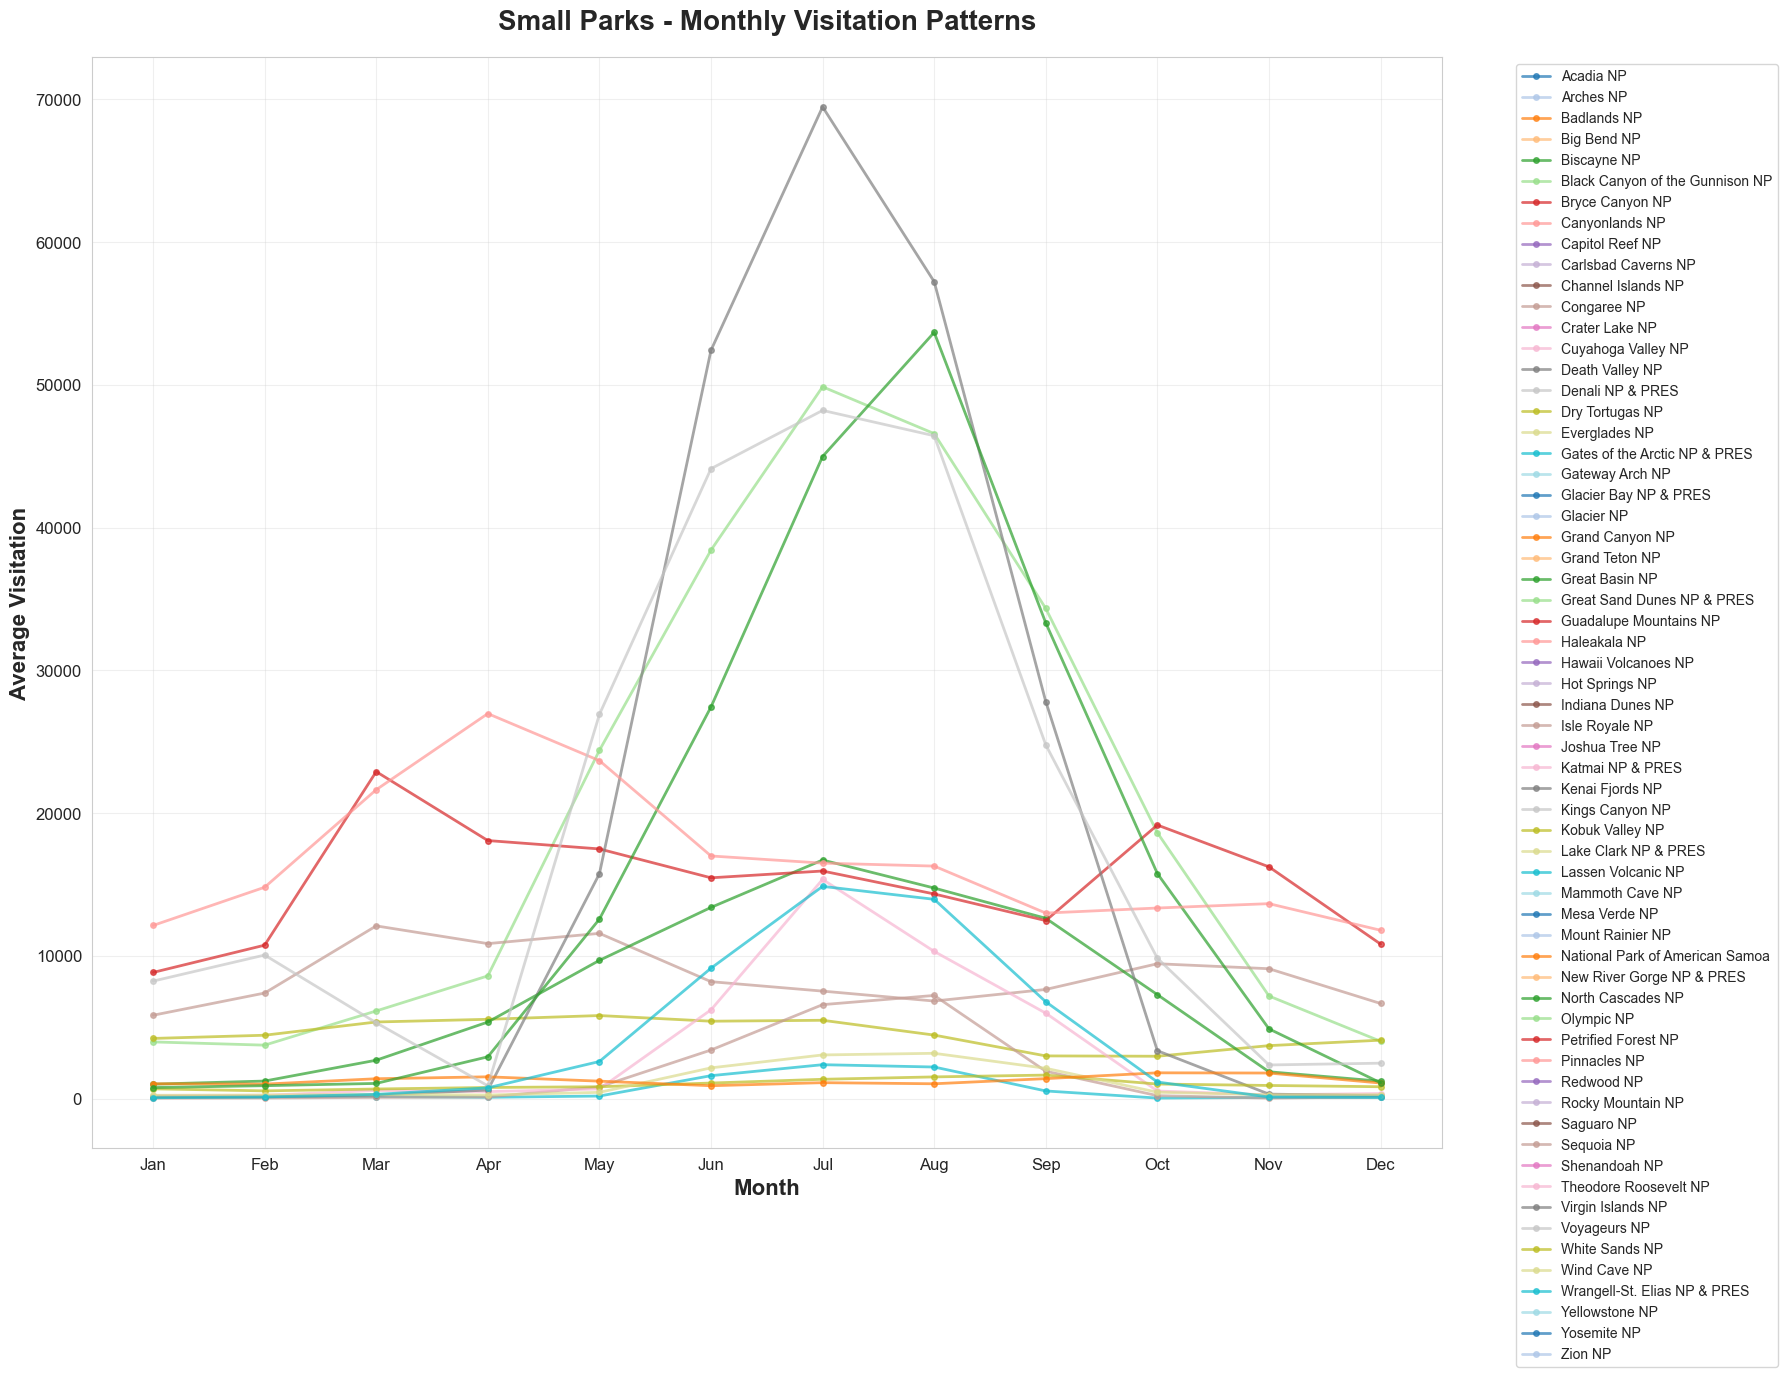

Small parks: 62 parks plotted\n


In [24]:
# GRAPH 1: Great Smoky Mountains NP (Separate)
gsm_data = monthly_avg[monthly_avg['ParkName'].str.contains('Great Smoky Mountains', case=False, na=False)]

if len(gsm_data) > 0:
    fig, ax = plt.subplots(figsize=(18, 14))
    
    gsm_monthly = gsm_data.sort_values('Month')
    ax.plot(gsm_monthly['Month'], gsm_monthly['AvgVisits'], 
            marker='o', linewidth=4, markersize=10, 
            label='Great Smoky Mountains NP', alpha=0.8, color='#2E8B57')
    
    # Customize the plot
    ax.set_xlabel('Month', fontsize=16, fontweight='bold')
    ax.set_ylabel('Average Visitation', fontsize=16, fontweight='bold')
    ax.set_title('Great Smoky Mountains NP - Monthly Visitation Patterns', fontsize=20, fontweight='bold', pad=20)
    ax.set_xticks(range(1, 13))
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=14)
    ax.tick_params(axis='both', labelsize=12)
    
    plt.tight_layout()
    plt.show()
    
    print(f"Great Smoky Mountains NP plotted separately\\n")

# Create 4 separate line graphs (one for each size category), excluding Great Smoky Mountains
size_categories = ['Extra Large', 'Large', 'Medium', 'Small']
colors = plt.cm.tab20(np.linspace(0, 1, 20))

for size in size_categories:
    # Create individual figure for each size category
    fig, ax = plt.subplots(figsize=(18, 14))
    
    # Filter data for this size category, excluding Great Smoky Mountains
    size_data = monthly_avg[
        (monthly_avg['SizeCategory'] == size) & 
        (~monthly_avg['ParkName'].str.contains('Great Smoky Mountains', case=False, na=False))
    ]
    parks = size_data['ParkName'].unique()
    
    # Plot each park as a line
    for i, park in enumerate(parks):
        park_data = size_data[size_data['ParkName'] == park].sort_values('Month')
        ax.plot(park_data['Month'], park_data['AvgVisits'], 
                marker='o', linewidth=2, markersize=4, 
                label=park, alpha=0.7, color=colors[i % len(colors)])
    
    # Customize the plot
    ax.set_xlabel('Month', fontsize=16, fontweight='bold')
    ax.set_ylabel('Average Visitation', fontsize=16, fontweight='bold')
    ax.set_title(f'{size} Parks - Monthly Visitation Patterns', fontsize=20, fontweight='bold', pad=20)
    ax.set_xticks(range(1, 13))
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    ax.grid(True, alpha=0.3)
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
    ax.tick_params(axis='both', labelsize=12)
    
    plt.tight_layout()
    plt.show()
    
    print(f"{size} parks: {len(parks)} parks plotted\\n")


## 5. Determine Seasonality for Each Park


In [25]:
# Define seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:  # 9, 10, 11
        return 'Fall'

monthly_avg['Season'] = monthly_avg['Month'].apply(get_season)

# Calculate average visitation by season for each park
seasonal_avg = monthly_avg.groupby(['ParkName', 'SizeCategory', 'Season'])['AvgVisits'].mean().reset_index()

# Find peak season for each park
park_seasonality = []

for park in seasonal_avg['ParkName'].unique():
    park_data = seasonal_avg[seasonal_avg['ParkName'] == park]
    
    # Peak season
    peak_season = park_data.loc[park_data['AvgVisits'].idxmax(), 'Season']
    peak_visits = park_data['AvgVisits'].max()
    
    # Low season
    low_season = park_data.loc[park_data['AvgVisits'].idxmin(), 'Season']
    low_visits = park_data['AvgVisits'].min()
    
    # Seasonal variation
    if low_visits > 0:
        variation_pct = ((peak_visits - low_visits) / low_visits) * 100
    else:
        variation_pct = np.inf
    
    # Size category
    size_cat = park_data['SizeCategory'].iloc[0]
    
    park_seasonality.append({
        'ParkName': park,
        'SizeCategory': size_cat,
        'PeakSeason': peak_season,
        'PeakVisits': peak_visits,
        'LowSeason': low_season,
        'LowVisits': low_visits,
        'SeasonalVariation%': variation_pct
    })

seasonality_df = pd.DataFrame(park_seasonality)
seasonality_df = seasonality_df.sort_values('PeakVisits', ascending=False)

print(f"Seasonality analysis completed for {len(seasonality_df)} parks\\n")
seasonality_df.head(20)


Seasonality analysis completed for 63 parks\n


/var/folders/y1/sdp6z2n512jfxp76fkhspjfc0000gn/T/ipykernel_79535/1296759838.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_avg = monthly_avg.groupby(['ParkName', 'SizeCategory', 'Season'])['AvgVisits'].mean().reset_index()


,ParkName,SizeCategory,PeakSeason,PeakVisits,LowSeason,LowVisits,SeasonalVariation%
26,Great Smoky Mountains NP,Small,Summer,2.256696e+06,Winter,945888.021739,138.579582
60,Yellowstone NP,Small,Summer,8.052259e+05,Winter,63007.239130,1177.989578
23,Grand Teton NP,Small,Summer,6.843959e+05,Winter,123414.449275,454.550832
50,Rocky Mountain NP,Small,Summer,6.146282e+05,Winter,75365.355072,715.531518
46,Olympic NP,Small,Summer,5.903989e+05,Winter,139454.565217,323.362931
0,Acadia NP,Small,Summer,5.791790e+05,Winter,28541.144928,1929.277285
22,Grand Canyon NP,Small,Summer,5.782205e+05,Winter,161038.514493,259.057278
61,Yosemite NP,Small,Summer,5.358635e+05,Winter,113672.478261,371.410030
21,Glacier NP,Small,Summer,5.063445e+05,Winter,9951.521739,4988.111570
19,Gateway Arch NP,Small,Summer,4.561998e+05,Winter,74592.753623,511.587334


### Peak Season Distribution


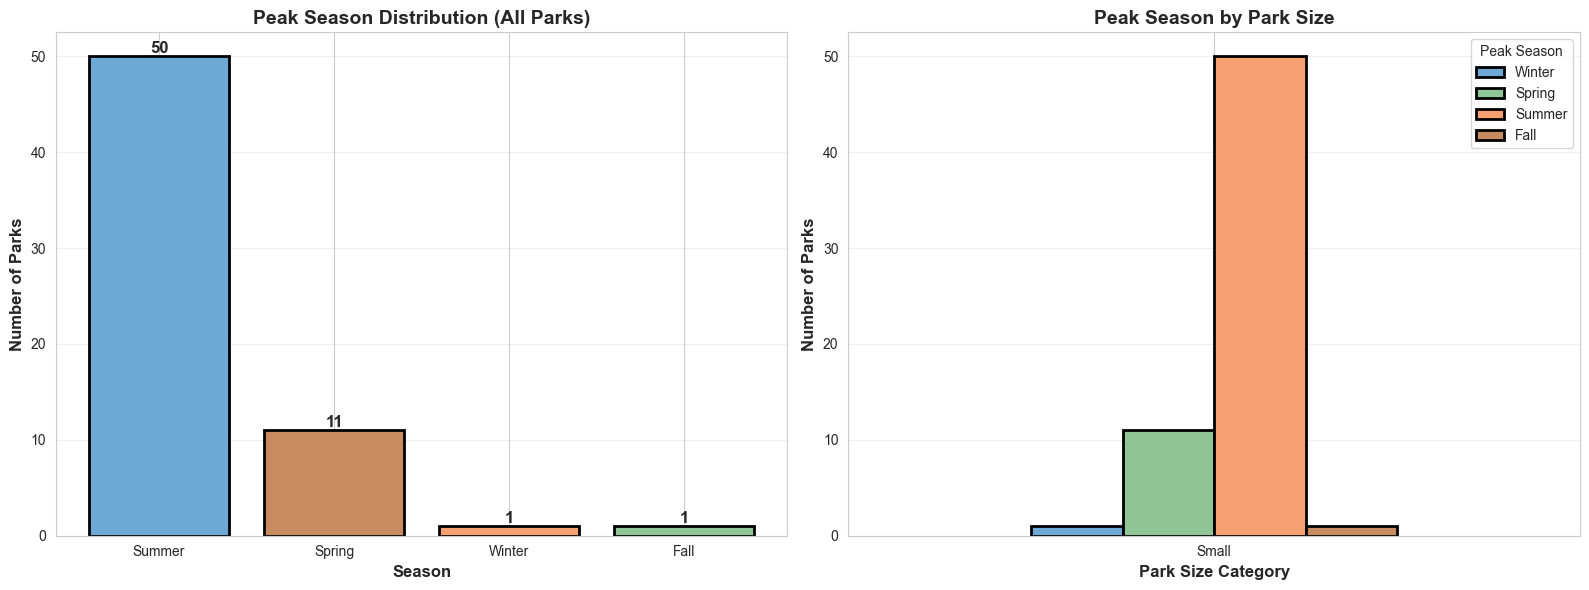

\nPeak Season Summary:
PeakSeason
Summer    50
Spring    11
Winter     1
Fall       1
Name: count, dtype: int64


In [26]:
# Visualize peak season distribution
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Overall peak season distribution
peak_counts = seasonality_df['PeakSeason'].value_counts()
axes[0].bar(peak_counts.index, peak_counts.values, 
            color=['#6EA8D4', '#C88B5F', '#F7A072', '#90C695'], edgecolor='black', linewidth=2)
axes[0].set_title('Peak Season Distribution (All Parks)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Season', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Number of Parks', fontsize=12, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Add value labels
for i, (season, count) in enumerate(peak_counts.items()):
    axes[0].text(i, count, str(count), ha='center', va='bottom', fontsize=12, fontweight='bold')

# Peak season by size category
peak_by_size = seasonality_df.groupby(['SizeCategory', 'PeakSeason']).size().unstack(fill_value=0)
peak_by_size = peak_by_size[['Winter', 'Spring', 'Summer', 'Fall']]
peak_by_size.plot(kind='bar', ax=axes[1], 
                  color=['#6EA8D4', '#90C695', '#F7A072', '#C88B5F'],
                  edgecolor='black', linewidth=2)
axes[1].set_title('Peak Season by Park Size', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Park Size Category', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Number of Parks', fontsize=12, fontweight='bold')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)
axes[1].legend(title='Peak Season', fontsize=10)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\\nPeak Season Summary:")
print(seasonality_df['PeakSeason'].value_counts())


## 6. Detailed Seasonality Report


In [27]:
# Print detailed seasonality report by size
print("=" * 100)
print("DETAILED SEASONALITY REPORT BY PARK SIZE")
print("=" * 100)

for size in ['Extra Large', 'Large', 'Medium', 'Small']:
    size_parks = seasonality_df[seasonality_df['SizeCategory'] == size].sort_values('PeakVisits', ascending=False)
    
    print(f"\\n\\n{'='*100}")
    print(f"{size.upper()} PARKS ({len(size_parks)} total)")
    print("=" * 100)
    print(f"{'Park Name':<50} {'Peak Season':<12} {'Peak Visits':>15} {'Low Season':<12} {'Variation %':>12}")
    print("-" * 100)
    
    for _, park in size_parks.iterrows():
        var_str = f"{park['SeasonalVariation%']:.1f}%" if park['SeasonalVariation%'] != np.inf else "N/A"
        print(f"{park['ParkName']:<50} {park['PeakSeason']:<12} {park['PeakVisits']:>15,.0f} "
              f"{park['LowSeason']:<12} {var_str:>12}")


DETAILED SEASONALITY REPORT BY PARK SIZE
\n\n====================================================================================================
EXTRA LARGE PARKS (0 total)
Park Name                                          Peak Season      Peak Visits Low Season    Variation %
----------------------------------------------------------------------------------------------------
\n\n====================================================================================================
LARGE PARKS (0 total)
Park Name                                          Peak Season      Peak Visits Low Season    Variation %
----------------------------------------------------------------------------------------------------
\n\n====================================================================================================
MEDIUM PARKS (0 total)
Park Name                                          Peak Season      Peak Visits Low Season    Variation %
---------------------------------------------------

## 7. Export Results


In [28]:
# Export seasonality results to CSV
seasonality_df.to_csv('park_seasonality_report.csv', index=False)
print("Seasonality report exported to: park_seasonality_report.csv")

# Export monthly averages
monthly_avg.to_csv('park_monthly_averages.csv', index=False)
print("Monthly averages exported to: park_monthly_averages.csv")


Seasonality report exported to: park_seasonality_report.csv
Monthly averages exported to: park_monthly_averages.csv
